In [14]:
# -*- coding: utf-8 -*-
"""
ST 2: Mathematical Modeling of Propagation Phenomena
TD 1: Graph Exploration 
10 December 2018
"""
from helper import *
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import networkx as nx

In [15]:
## Exercise 1.1
# Read the edgelist of the NetScience network
G = nx.read_edgelist("./NetScience.edgelist", comments='#', delimiter='\t')


In [16]:
## Exercise 1.2
def compute_network_characteristics(graph):
    prop = {}
    prop['N'] = len(G.nodes) #number of vertices
    prop['M'] =  len(G.edges)# number of edges

    prop['min_degree'] = min([degree for (node,degree) in G.degree])# minimum degree
    prop['max_degree'] =  max([degree for (node,degree) in G.degree]) # maximum degree
    prop['mean_degree'] = np.mean([degree for (node,degree) in G.degree]) # mean of node degrees
    prop['median_degree'] = np.median([degree for (node,degree) in G.degree]) # median of node degrees
    prop['density'] = 2*prop['M']/(prop['M']*(prop['M']-1))# density of the graph
    return prop


In [17]:
prop = compute_network_characteristics(graph=G)
print("Number of nodes: {}".format(prop['N']))
print("Number of edges: {}".format(prop['M']))
print("Min. degree: {}".format(prop['min_degree']))
print("Max. degree: {}".format(prop['max_degree']))
print("Mean degree: {}".format(prop['mean_degree']))
print("Median degree: {}".format(prop['median_degree']))
print("Density: {}".format(prop['density']))

Number of nodes: 1461
Number of edges: 2742
Min. degree: 1
Max. degree: 34
Mean degree: 3.753593429158111
Median degree: 3.0
Density: 0.0007296607077708865


In [22]:
## Exercise 2.1-2.3
def get_gcc(G):
    # Is the given graph connected?
    connected =  nx.is_connected(G)# check if the graph is connected or not
    if connected:
        print("The graph is connected")
        return graph
    else:
        print("The graph is not connected")

    # Find the number of connected components
    num_of_cc = nx.number_connected_components(G)
    print("Number of connected components: {}".format(num_of_cc))

    # Get the largest connected component (GCC) subgraph
    gcc = sorted(nx.connected_component_subgraphs(G, copy = True), key = len, reverse = True)[0]  #max([len(sub_graph) for sub_graph in nx.connected_components(G)])
    node_fraction = len(gcc.nodes)/len(G.nodes)
    edge_fraction =  len(gcc.edges)/len(G.edges)

    print("Fraction of nodes in GCC: {:.3f}".format(node_fraction))
    print("Fraction of edges in GCC: {:.3f}".format(edge_fraction))

    return gcc

# Get the GGC of the network
gcc = get_gcc(G)

The graph is not connected
Number of connected components: 268
Fraction of nodes in GCC: 0.259
Fraction of edges in GCC: 0.333


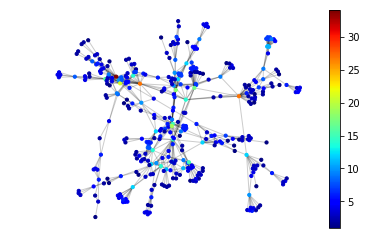

In [23]:
## Exercise 2.4
# Visualize the GCC of the network
visualize(graph=gcc, values=gcc.degree(), node_size=10)

In [42]:
## Exercise 3.1
def count_triangles_of(graph, node):
    count = 0
    node_neighbors = nx.neighbors(graph,node)
    for neighbor in node_neighbors:
        for neighbor2 in nx.neighbors(graph,neighbor):
            if node in nx.neighbors(graph,neighbor2):
                count += 1
    return count/2

In [43]:
## Exercise 3.2
def count_all_triangles(graph):
    count = 0
    for vertice in graph.nodes:
        count += count_triangles_of(graph,vertice)
    count = count/3 #we gotta divide by three because for each triangle, we have 3 nodes in it
    return count

In [44]:
num_of_triangles = count_all_triangles(graph=G)
assert num_of_triangles == np.sum(list(nx.triangles(G).values()))/3, "Incorrect result!"
print("Number of triangles in the graph: {}".format(num_of_triangles))

Number of triangles in the graph: 3764.0


In [51]:
## Exercise 3.3
# Spectral computation of the number of triangles by using eigenvalues 
def spectral_num_of_triangles_counting(graph):
    
    A = nx.adjacency_matrix(graph).todense() # adjacency matrix of graph 
    eigval, eigvec = eigh(A) # compute eigenvalues
    count = np.sum(np.power(eigval, 3)) / 6 
    
    return count

In [52]:
spectral_num_of_triangles_counting(G)

3764.0

In [53]:
## Exercise 4.1
# Complete the following method computing the clustering coefficient of a node
def clustering_coefficient_of(graph, node):
    cc = 0.0
    
    d = nx.degree(graph, node) # get the degree of the node
    if d > 1: # if the degree is greater or equal to 2
        # Compute clustering coefficient
        cc = 2.0*count_triangles_of(graph, node) / (d * (d-1))
    
    return cc

In [54]:
## Exercise 4.2
def average_clustering_coefficient(graph):
    avcc = 0.0
    
    for node in graph.nodes():
        avcc += clustering_coefficient_of(graph, node)
    avcc = avcc / graph.number_of_nodes()        
        
    return avcc

In [55]:
avg = average_clustering_coefficient(graph=G)
assert np.abs(avg - nx.average_clustering(G))<0.001, "Incorrect result!"
print("Average clustering coefficient: {:.3f}".format(avg))

Average clustering coefficient: 0.694


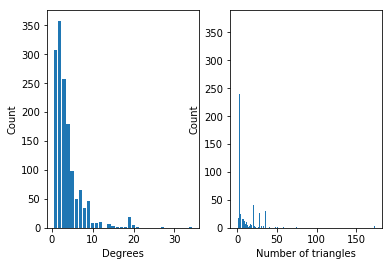

In [64]:
## Exercise 5.1
def plot_histograms(graph):
    # degree sequence
    #degree_sequence = graph.degree().values()
    degree_sequence = [degree for node, degree in graph.degree()] 
    degree_count_values = sorted(set(degree_sequence))
    degree_hist = [degree_sequence.count(val) for val in degree_count_values]
    
    # the sequence of number of triangles that each node participates
    triangle_participation = list(nx.triangles(graph).values()) 
    tr_count_values = sorted(set(triangle_participation))
    tri_hist = [triangle_participation.count(val) for val in tr_count_values]
    

    plt.subplot(1,2,1)
    plt.bar(degree_count_values, degree_hist)
    plt.xlabel("Degrees")
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    plt.bar(tr_count_values, tri_hist)
    plt.xlabel("Number of triangles")
    plt.ylabel("Count")
    
    plt.show()

plot_histograms(graph=G)


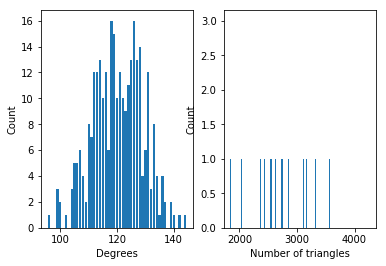

In [65]:
## Exercise 5.2
# Generate an Erdos-Renyi graph
er_graph = nx.erdos_renyi_graph(n=300, p=0.4)
plot_histograms(graph=er_graph)

In [66]:
## Exercise 6
def compute_diameter(graph):
    # It is assumed that given graph is connected
    diameter = 0
    
    max_lens = {}
    for node in graph.nodes():
        length=nx.single_source_shortest_path_length(G, node)
        max_lens[node] = max(length.values())

    diameter = max(max_lens.values())
    
    return diameter

In [67]:
diameter = compute_diameter(graph=gcc)
assert diameter == nx.diameter(gcc), "Incorrect result!"

print("Diameter of the gcc: {}".format(diameter)) 

Diameter of the gcc: 17
